# NumPy Basics

NumPy - short for numerical Python - is an essential foundational packages for numerical computing in Python. One of Numpy's primary use in data analysis applications is as a container for data to be passed between algorithms and libraries. NumPy is more efficient for storing and manipulating data than the other built-in Python data structures is because it is designed for efficiency on large arrays of data. Reasons for this are:

+ NumPy internally stores data in a contigious block of memory, independent of other built-in Python objects. It operate on this memory without any type checking or other overhead. NumPy also uses much less memory than other built-in Python sequences.
+ NumPy operations perform complex computations on entire arrays without the need for Python `for` loops.

First, we will firstly need to import numpy library in Python:

In [1]:
# import numpy library and assigning alias, np
import numpy as np

Examples below illustrate the performance difference between computations on a NumPy array and a Python list:

In [2]:
my_arr = np.arange(1_000_000)    # numpy array
my_list = list(range(1_000_000)) # Python list

# compute and display processing time for comparison
%time for _ in range(10): my_arr2 = my_arr*2
# time < 20 ms
    
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]
# time 400+ ms

CPU times: user 8.8 ms, sys: 4.84 ms, total: 13.6 ms
Wall time: 13.5 ms
CPU times: user 354 ms, sys: 56.4 ms, total: 410 ms
Wall time: 410 ms


## The NumPy *ndarray*

A key features of NumPy is its N-dimensional array object, or *ndarray* - a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax equivalent operations between scalar elements. Below are some examples of computations on NumPy arrays:

In [3]:
data = np.random.randn(2,3) # generate 2x3 array of random numbers
print(data)
print("")

# multiply all elements by 10 in the array
data * 10

# add each array element by itself, i.e. double the elements
data + data

[[ 2.0944868  -0.52872199 -0.01112943]
 [ 0.4956448  -1.20064218 -0.6652001 ]]



array([[ 4.1889736 , -1.05744398, -0.02225885],
       [ 0.99128959, -2.40128435, -1.3304002 ]])

### Creating *ndarrays*

Use the `array` function from the `numpy` class to create an array. For example:

In [4]:
data1 = [6, 7.5, 8, 0, 1]  # a list of numbers
print(data1)

arr1 = np.array(data1) # convert a list to numpy array
print(arr1)

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]  # a nested list comprising list of numbers
print(data2)

arr2 = np.array(data2) # convert nested lists to numpy array
print(arr2)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
[[1, 2, 3, 4], [5, 6, 7, 8]]
[[1 2 3 4]
 [5 6 7 8]]


In addition to `np.array`, there are other ways for creating new arrays. As examples, zeros and ones create arrays of 0s and 1s, respectively, with a given length or shape. `empty` creates an array without initialising its values to any particular value. To create higher dimensional array with these methods, pass a tuple for the shape:

In [5]:
# create array of 10 zeroes
x = np.zeros(10)
print(f"{x}\n")

# create 3x6 array of zeroes
x = np.zeros((3, 6))
print(f"{x}\n")

# create empty array of 2x3x2
x = np.empty((2, 3, 2))
print(f"{x}")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[[4.68117802e-310 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]

 [[0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 0.00000000e+000]]]


**Note**: *`np.empty` does not set array values to zeroes; it may return uninitialised "garbage" values. It is marginally faster than zero array but on the other hand, it requires the user to manually set all the values in the array, thus should be used with caution.*

### Array dimensions
Inspecting dimensions of arrays:

In [6]:
# get n dimensions (i.e. rows)
print(arr2.ndim)
# 2

# get n rows and m columns
print(arr2.shape)
# (2, 4)

2
(2, 4)


### Data Types for *ndarrays*

`dtypes` are a source of NumPy's flexibility for interacting with data coming from other systems. They facilitate the ndarray to interpret a chunk of memory as a particular type of data. The `numpy.array()` arrays will attempt to infer an appropriate data type for the array created. 

In [7]:
print(arr1.dtype)  # float64
print(arr2.dtype)  # int64

float64
int64


We can set the `dtype` when creating arrays like below:

In [8]:
arr1 = np.array([1, 2, 3], dtype=np.float64)  # generate array to store float values
arr2 = np.array([1, 2, 3], dtype=np.int32)    # generate array to store integer values

print(arr1.dtype)
print(arr2.dtype)

float64
int32


In most cases, *dtypes* provide a mapping directly onto an underlying disk or memory representation, which makes it easy to read and write binary streams of data to disk and also to connect to code written in a low-level language like C or Fortran. A standard double-precision floating-point value takes up 8 or 64 bits. Thus, this type is know in Numpy as `float64`. Below is the full listing of NumPy's supported data types:

**Type** | **Type code** | **Description**
--- | --- | ---
int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types
int16, uint16 | i2, u2 | Signed and unsigned 16-bit integer types
int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types
int64, uint64 | i8, u8 | Signed and unsigned 64-bit integer types
--- | --- | ---
float16 | f2 | Half-precision floating point
float32 | f4 or f | Standard single-precision floating point; compatible with C float
float64 | f8 or d | Standard double-precision floating point; compatible with C double and Python float object
float128 | f16 or g | Extended-precision floating point
--- | --- | ---
complex64 | c8 | Complex numbers represented by two 32 floats 
complex128 | c16 | Complex numbers represented by two 64 floats 
complex256 | c32 | Complex numbers represented by two 128 floats 
--- | --- | ---
bool | ? | Boolean type storing `True` and `False` values
object | O | Python object type; a value can be any Python object
string_ | S | Fixed-length ASCII type (1 byte per character)
unicode_ | U | Fixed-length Unicode type (number of bytes platform specific)


### Typecast using `astype` method
You can explicitly convert or cast an array from one dtype to another, using `astype` method:

In [9]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype   
# dtype('int64')

# cast array to float64 type
float_arr = arr.astype(np.float64)  

float_arr.dtype  
# dtype('float64')


# casting from float to integer will truncate decimal part of values
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.dtype  
# dtype('float64')

arr.astype(np.int32)  
# array([3, -1, -2, 0, 12, 10])

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

**Note**: *Calling `astype` always create a new array (a copy of the data).*

## Basic Indexing and Slicing

Like Python lists, NumPy arrays also support indexing and slicing. For example:

In [10]:
arr = np.arange(10) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

print(arr[5])  # retrieve 6th elem

print(arr[5:8])  # retrieve 6th to 8th items in the array

arr[5:8] = 12

print(arr[5:8])

5
[5 6 7]
[12 12 12]


Accessing a two-dimensional array:

In [11]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]
# [7, 8, 9]

arr2d[0, 2]
# 3

3

**Note:** Unlike a Python list, array slices are *view* on the original array. Thus any value modifications done to the slice will be reflected in the source array.

In [12]:
arr_slice = arr[5:8]  # obtain slice of 6th to 8th elements from array
arr_slice[1] = 12345  # modify 1st item in slice

print(arr_slice)

# changes in slice is reflected in the original array
print(arr)


# this assigns to all values in an array
arr_slice[:] = 12345

print(arr)

[   12 12345    12]
[    0     1     2     3     4    12 12345    12     8     9]
[    0     1     2     3     4 12345 12345 12345     8     9]


To prevent modifying the original array while working on array slices, you can use `copy()` method when slicing:

In [13]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

# copy out the slice instead of getting just the "view"
old_values = arr3d[0].copy()  

# set values of first vector in the first dimension in the array to 42
arr3d[0] = 42  
print(arr3d)

# reset back to old values
arr3d[0] = old_values  
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


Illustration of two-dimensional array slicing:

<img src="https://www.oreilly.com/library/view/python-for-data/9781449323592/httpatomoreillycomsourceoreillyimages2172114.png" width="300" />

### Boolean Indexing

Instead of numerical indexing, we can also use boolean indexing to select data from array in the examples below:

In [14]:
# generate NumPy array from a list of names
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

# generate random data array with number of rows corresponding to names.ndim (i.e. 7)
data = np.random.randn(7, 4)
print(data)
print("\n")

# return array of same shape comprising boolean result
names == 'Bob'
# array([ True, False, False,  True, False, False, False])


# get array rows based on earlier condition result
x = data[names == 'Bob']
print(f"{x}\n")

# return array rows based on false negatives of earlier condition result
x = data[~(names == 'Bob')]
print(f"{x}\n")

# does the same as previous one
x = data[names != 'Bob']
print(f"{x}\n")

[[-0.20441146  0.38585087  1.4906113  -1.11342247]
 [ 0.15861823 -0.66297357  0.74105278 -0.30654483]
 [-0.63991352  0.06267597  1.03034626  0.63484943]
 [ 0.23983791 -0.24842102  0.2583728   0.24631569]
 [-0.04867771 -0.31855581 -0.55082843 -0.40598354]
 [ 0.66245713  0.84843414 -0.48019079  0.75375328]
 [-1.40734971  0.75494549 -1.34637765 -1.92290023]]


[[-0.20441146  0.38585087  1.4906113  -1.11342247]
 [ 0.23983791 -0.24842102  0.2583728   0.24631569]]

[[ 0.15861823 -0.66297357  0.74105278 -0.30654483]
 [-0.63991352  0.06267597  1.03034626  0.63484943]
 [-0.04867771 -0.31855581 -0.55082843 -0.40598354]
 [ 0.66245713  0.84843414 -0.48019079  0.75375328]
 [-1.40734971  0.75494549 -1.34637765 -1.92290023]]

[[ 0.15861823 -0.66297357  0.74105278 -0.30654483]
 [-0.63991352  0.06267597  1.03034626  0.63484943]
 [-0.04867771 -0.31855581 -0.55082843 -0.40598354]
 [ 0.66245713  0.84843414 -0.48019079  0.75375328]
 [-1.40734971  0.75494549 -1.34637765 -1.92290023]]



Combining multiple boolean conditions:

In [15]:
mask = (names == 'Bob') | (names == 'Will')  # get boolean results of either name is 'Bob' or 'Will' (in 1-d array)
# array([ True, False,  True,  True,  True, False, False])

# returns n-th row of data array corresponding to true values in 'mask' array 
data[mask]

array([[-0.20441146,  0.38585087,  1.4906113 , -1.11342247],
       [-0.63991352,  0.06267597,  1.03034626,  0.63484943],
       [ 0.23983791, -0.24842102,  0.2583728 ,  0.24631569],
       [-0.04867771, -0.31855581, -0.55082843, -0.40598354]])

In [16]:
# setting values less than zero in the array to zero
data[data < 0] = 0
print(f"{data}\n")

# setting values (in rows corresponding to names not Joe) in the array to 7
data[names != 'Joe'] = 7
print(data)

[[0.         0.38585087 1.4906113  0.        ]
 [0.15861823 0.         0.74105278 0.        ]
 [0.         0.06267597 1.03034626 0.63484943]
 [0.23983791 0.         0.2583728  0.24631569]
 [0.         0.         0.         0.        ]
 [0.66245713 0.84843414 0.         0.75375328]
 [0.         0.75494549 0.         0.        ]]

[[7.         7.         7.         7.        ]
 [0.15861823 0.         0.74105278 0.        ]
 [7.         7.         7.         7.        ]
 [7.         7.         7.         7.        ]
 [7.         7.         7.         7.        ]
 [0.66245713 0.84843414 0.         0.75375328]
 [0.         0.75494549 0.         0.        ]]


### Fancy Indexing

Fancy Indexing refers to indexing using integer arrays:

In [17]:
arr = np.arange(32).reshape((8, 4))   # generate series of 0-31 numbers and shape them into 8x4 array
print(f"{arr}\n")

## pass in [4, 3, 0, 6] as 1 argument
# get 5th, 4th, 1st and 7th rows of arr
x = arr[[4, 3, 0, 6]]
print(f"{x}\n")

# contrast with below code (less 1 pair of square brackets, which returns item in 5th row, 4th column
x = arr[4, 3]
print(f"{x}\n")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

[[16 17 18 19]
 [12 13 14 15]
 [ 0  1  2  3]
 [24 25 26 27]]

19



In the 2nd example above, we pass `[4, 3, 0, 6]` as the first argument for array indexing, which in turn will return array slice comprising the 5th, 4th, 1st and 7th rows (recall indices starts from zero in Python instead of 1) in that order. In the 3rd example, we pass in `4` as first argument and `3` as the second argument to retrieve the element residing in 5th row, 4th column of the array. 

Also note that fancy indexing *always copies* the data into a new array, unlike slicing.

More complex indexing examples below:

In [18]:
# retrieve the 1st, 4th, 2nd and 3rd elements from respective rows in the earlier data subarray
x = arr[[4, 3, 0, 6], [0, 3, 1, 2]]
print(f"{x}\n")

# retrieve the 4th column from the subarray specified by first argument: [4, 3, 0, 6]
x = arr[[4, 3, 0, 6], 3]
print(f"{x}\n")

# modifying the values in array returned by fancy indexing doesn't impact the original values
x = arr[[4, 3, 0, 6], 3]
x[0] = 1
print(arr)

[16 15  1 26]

[19 15  3 27]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


## Transposing Array, Swapping Axes

The transpose of a array returns a flipped view of the array over its diagonal, whereby the rows and columns are swapped. Transposing returns merely a *view* of the data thus modifying the returned transposed matrix will modify the original data. Arrays have the `transpose` method and also the special `T` attribute to facilitate the transpose operations:

In [19]:
# transpose matrix/array
arr = np.random.randn(6, 3)
print(arr)
print("\n---transposed form---")
print(arr.T)

# this does the same
print("\n---another way to transpose---")
print(arr.transpose(1, 0))   # reorder 2nd (y-axis) with the 1st (x-axis)

[[ 1.2866073   0.4914248  -0.18620293]
 [-1.36610769  1.3869818   1.31073899]
 [-2.09584146 -1.08412288 -1.82264129]
 [-0.41615602 -1.55643405 -0.26918701]
 [ 0.24242452 -0.9274103  -1.64420362]
 [-0.70820537 -1.10987034  0.95317819]]

---transposed form---
[[ 1.2866073  -1.36610769 -2.09584146 -0.41615602  0.24242452 -0.70820537]
 [ 0.4914248   1.3869818  -1.08412288 -1.55643405 -0.9274103  -1.10987034]
 [-0.18620293  1.31073899 -1.82264129 -0.26918701 -1.64420362  0.95317819]]

---another way to transpose---
[[ 1.2866073  -1.36610769 -2.09584146 -0.41615602  0.24242452 -0.70820537]
 [ 0.4914248   1.3869818  -1.08412288 -1.55643405 -0.9274103  -1.10987034]
 [-0.18620293  1.31073899 -1.82264129 -0.26918701 -1.64420362  0.95317819]]


You can easily perform inner matrix product computations using `np.dot`:

In [20]:
# computation using np.dot
np.dot(arr.T, arr)

array([[8.6476703 , 2.21856245, 0.82816913],
       [2.21856245, 7.85492824, 4.58835249],
       [0.82816913, 4.58835249, 8.75914534]])

### More complex array swap/transpose

For higher-dimensional arrays, you can use the `transpose` method that takes in a tuple of axes as an argument to permute the axes:

In [21]:
arr = np.arange(16).reshape((2, 2, 4))  # reshape into a 3-dimensional array
print(arr)

print("\n---1st axis, 1st item---")
print(arr[0])

print("\n---2nd axis, 1st item---")
print(arr[:,0])

print("\n---3rd axis, 1st item---")
print(arr[:,:,0])
print("\n")

# reorder axis: swap 2nd axis with the 1st
print(arr.transpose((1, 0, 2)))

# this does the same thing
arr.swapaxes(1, 0)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]

---1st axis, 1st item---
[[0 1 2 3]
 [4 5 6 7]]

---2nd axis, 1st item---
[[ 0  1  2  3]
 [ 8  9 10 11]]

---3rd axis, 1st item---
[[ 0  4]
 [ 8 12]]


[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In the above example, the `swapaxes` method takes a pair of axis numbers and switches the indicated axes to rearrange the data:

## Array-Oriented Programming Methods/Functions

### Universal functions
NumPy provides for simple element-wise transformations via universal functions like `sqrt` or `exp`. These include unary and binary functions. Below are listing of available universal functions:

*Unary functions:*

**Function** | **Description**
--- | ---
`abs`, `fabs` | Compute the absolute value element-wise
`sqrt` | Compute square root of each element
`exp` | Compute the exponent of each element
`log`, `log10`, `log2`, `log1p` | Return the natural logarithm (base e), log base 10, log base 2, and log(1+x) respectively
`isnan` | Return True or False values indicating whether each element is NaN (Not a Number)
`isfinite`, `isinf` | Return True or False values indicating whether each element is finite or infinite, respectively
`sign` | Compute the sign of each element: 1 (positive); 0 (zero); -1 (negative)
`ceil` | Compute the ceiling of each element
`floor` |  Compute the floor of each element
`rint` | Round elements to the nearest integer, preserving `dtype`.
`modf` | Return fractional and integral parts of array as a separate array
`cos`, `cosh`, `sin`, `sinh`, `tan`, `tanh` | Regular and hyperbolic trigonometric functions
`arccos`, `arccosh`, `arcsin`, `arcsinh`, `arctan`, `arctanh` | Inverse trigonometric functions
`logical_not` | Compute truth value of `not` element-wise (same as `~arr`)


*Binary functions:*

**Function** | **Description**
--- | ---
`add` | Add corresponding elements in arrays
`subtract` |  Subtract elements in second array from first array
`multiply` | Multiply array elements
`divide`, `floor_divide` |  Divide or floor divide (trauncating the reminder)
`power` |  Raise elements in the first array to powers indicated in second array
`maximum`, `fmax` | Element-wise maximum; fmax ignores `NaN`
`minimum`, `fmin` | Element-wise minimum; fmin ignores `NaN`
`mod` | Element-wise modulus (remainder of division) 
`copysign` | Copy sign of values in second argument to values in first argument
`greater`, `greater_equal`, `less`, `less_equal`, `equal`, `not_equal` | Perform element-wise comparison, yielding boolean array (equivalent to infix operators `>`, `>=`, `<`, `<=`, `==`, `!=`)
`logical_and`, `logical_or`, `logical_xor` | Compute element-wise truth value of logical operation (equivalent to infix opertors `&`, `|`, `^`)

Some examples below:

In [22]:
x = np.random.randn(8)
y = np.random.randn(8)
print(f"x: {x}\n")
print(f"y: {y}\n")

# find maximum of the two element-wise
z = np.maximum(x, y)
print(f"--max--\n{z}\n")


# sep integral and remainder
remainder, whole_part = np.modf(x)
print(f"--remainder--\n{remainder}\n")
print(f"--whole_part--\n{whole_part}\n")


arr = np.random.randn(8) * 5
print(f"arr:\n{arr}")

# perform square root element-wise
print(f"\nsquare root:\n{np.sqrt(arr)}")

x: [-0.15894969  0.77372063 -0.8793879   0.62683877  0.76315083  0.54654707
  1.5490606  -1.53560224]

y: [-0.29311984 -0.4868165   1.15622616  0.48174356 -1.09519053 -1.78388079
  1.58049864 -0.11923948]

--max--
[-0.15894969  0.77372063  1.15622616  0.62683877  0.76315083  0.54654707
  1.58049864 -0.11923948]

--remainder--
[-0.15894969  0.77372063 -0.8793879   0.62683877  0.76315083  0.54654707
  0.5490606  -0.53560224]

--whole_part--
[-0.  0. -0.  0.  0.  0.  1. -1.]

arr:
[ 3.23117781  0.13035162 -6.89460885 -6.53703462  8.52121238 -6.3233094
  2.72469705  4.25251141]

square root:
[1.79754772 0.36104241        nan        nan 2.91911157        nan
 1.65066564 2.06216183]


<ipython-input-22-10dab6600ca1>:21: RuntimeWarning: invalid value encountered in sqrt
  print(f"\nsquare root:\n{np.sqrt(arr)}")


*Note: ignore the warning above - this is due to the `sqrt` function encountering negative values which it is unable to get square root, thus it outputs `NaN` values.*

The above universal functions also accept an *out* parameter which assigns the result to the variable you pass in as the paremeter. You can thus make modifications to the arrays in-place by passing in the array object as the *out* argument:

In [23]:
newarr = np.zeros(8)  # generating zero array

np.sqrt(arr, newarr)  # assigns result to newarr 
print(newarr)
print()

print(arr)            # no modifications to the original array
print()

# square root on array elements in-place - modify the original values
np.sqrt(arr, arr) 
print(arr)

[1.79754772 0.36104241        nan        nan 2.91911157        nan
 1.65066564 2.06216183]

[ 3.23117781  0.13035162 -6.89460885 -6.53703462  8.52121238 -6.3233094
  2.72469705  4.25251141]

[1.79754772 0.36104241        nan        nan 2.91911157        nan
 1.65066564 2.06216183]


<ipython-input-23-37f33fc132cf>:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, newarr)  # assigns result to newarr
<ipython-input-23-37f33fc132cf>:11: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


### Mathematical and Statistical Methods

NumPy also supports aggregations like `sum`, `mean` and `std`. The listing of basic array statistical methods is as follow:

**Method** | **Description**
--- | ---
`sum` | Sum of all the elements in the array or along an axis
`mean` | Arithmethc mean; zero-length arrays have `NaN` mean
`std`, `var` | Compute the standard deviation and variance, respectively; optional degrees of freedoms adjustment can be specified
`min`, `max` | Compute the minimum and maximum
`argmin`, `argmax` | Indices of minimum and maximum elements, respectively
`cumsum` | Cumulative sum of elements starting from 0
`cumprod` | Cumulative products of elements starting from 1

You can invoke the methods like these:

In [24]:
arr = np.random.randn(4, 5)
print(arr)

print(arr.mean())  # compute mean

print(np.mean(arr))   # this does the same

print(arr.sum())  # compute sum

# combining with boolean condition and summation
(arr > 0).sum()

[[-0.25638144 -0.71708718  0.64333616  0.75040106 -0.95490357]
 [-0.92740085  1.29851017 -0.99399795  1.36076664 -0.32467909]
 [ 0.05133104  0.47344331 -0.11921875  0.1616873   0.30243564]
 [ 1.33633776  0.11551272  0.98103432 -0.39414133 -2.31799061]]
0.023449768920625336
0.023449768920625336
0.4689953784125067


11

Some of these functions take an optional `axis` argument that computes over the given axis:

In [25]:
print(arr.mean(axis=1))  # compute mean across columns for each row

print(arr.mean(axis=0))  # compute mean across rows for each column

[-0.10692699  0.08263978  0.17393571 -0.05584943]
[ 0.05097163  0.29259476  0.12778845  0.46967842 -0.82378441]


### `any` and `all` methods

`any` and `all` methods are useful especially for boolean arrays. `any` tests whether one or more values in an array is `True`, while `all` checks if every value is `True`. These methods also work with non-boolean arrays, where non-zero elements evaluted to `True`:

In [26]:
bools = np.array([False, False, True, False])

bools.any()
# True

bools.all()
# False

False

### Sorting

Like Python's built-in `list` type, NumPy arrays can be sorted in-place with the `sort` method:

In [27]:
arr = np.random.randn(6)
print(arr)

# sort in ascending order
arr.sort()
print(arr)

# reverse items to achieve descending sort order 
arr[::-1]

[-0.13296879 -1.91632774 -0.7606464   0.18325439 -0.12973182  0.84770869]
[-1.91632774 -0.7606464  -0.13296879 -0.12973182  0.18325439  0.84770869]


array([ 0.84770869,  0.18325439, -0.12973182, -0.13296879, -0.7606464 ,
       -1.91632774])

In [28]:
# practical example of using sort to compute quantile
large_arr = np.random.randn(1000)
large_arr.sort()

large_arr[int(0.05 * len(large_arr))]  # 5% quantile

-1.75501947244533

You can sort each one-dimensional section of values in a multi-dimensional array in-place along an axis by passing the axis number to sort:

In [29]:
arr = np.random.randn(5, 3)
print(arr)

arr.sort(1)  # sort elements within each row
print(f"\n{arr}")

[[ 1.61717588 -1.15905903 -0.16806099]
 [ 0.06973258 -0.70753739 -1.00573093]
 [ 1.26978184  1.44786821  1.78312298]
 [ 0.49811927 -1.19723357 -0.12441345]
 [ 0.54398661  0.61491705  0.67638713]]

[[-1.15905903 -0.16806099  1.61717588]
 [-1.00573093 -0.70753739  0.06973258]
 [ 1.26978184  1.44786821  1.78312298]
 [-1.19723357 -0.12441345  0.49811927]
 [ 0.54398661  0.61491705  0.67638713]]


### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. One commonly used operation is `np.unique`, which returns the sorted unique values in an array:

In [30]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)
# ['Bob', 'Joe', 'Will']


# contrast this with pure Python alternative method
sorted(set(names))
# ['Bob', 'Joe', 'Will']

['Bob', 'Joe', 'Will']

Another useful set method is `np.in1d`, which tests membership of the values in one array in another, returning a boolean array:

In [31]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

A listing of set functions in NumPy:

**Method** | **Description**
--- | ---
unique(x) | Compute the sorted, unique elements in x
intersect1d(x, y) | Compute the sorted, common elements in x and y
union1d(x, y) |  Compute the sorted union of elements
in1d(x, y) | Compute a boolean array indicating whether each element of x is contained in y
setdiff1d(x, y) | Set difference, elements in x that are not in y
setxor1d(x, y | Set symmetric differences; elements that are in either of the arrays, but not both

### Linear Algebra

Linear algebra, like matrix manipulation, decompositions, determinants, and other square matrix math, is an important part of any array library. Below table lists some of the most commonly used linear algebra functions for Numpy:

**Function** | **Description**
--- | ---
`diag` | Return the diagonal elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
`dot` | Matrix multiplication
`trace` | Compute the sum of the diagonal elements
`det` | Compute the matrix determinant
`eig` | Compute the eigenvalues and eigenvectors of a square matrix
`inv` | Compute the inverse of a square matrix
`pinv` | Compute the Moore-Penrose pseudo-inverse of a matrix

Some examples of numpy's linear algebra methods:

In [32]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

# matrix dot product
x.dot(y)
# array([[ 28.,  64.],
#        [ 67., 181.]])

# this is the same as 
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

## Pseudorandom Number Generation

You have already seen the use of `numpy.random` in the earlier examples. The `numpy.random` module supplements the built-in Python `random` with functions for efficiently generating whole arrays of sample values from various kinds of probability distributions. Python's built-in `random` module, by contrast, only samples one value at a time. Thus `numpy.random` is more suited for generating very large samples as shown below:

In [33]:
from random import normalvariate

N = 1_000_000

# using built-in random for sample value generation
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

# using numpy's random for sample value generation
%timeit np.random.normal(size=N)

689 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.4 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
# generating 4x4 array of values from standard normal distribution
samples = np.random.normal(size=(4, 4))

The *pseudorandom* numbers are generated by an algorithm with deterministic behaviour based on the *seed* of the random number generator. You can change NumPy's random number generation seed as follow:

In [35]:
# setting global random seed
np.random.seed(1234)

# setting a local random seed
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

Table partially lists functions available in `numpy.random` module:

**Function** | **Description**
--- | ---
`seed` | Seed the random number generator
`permutation` | Return a random permutation of a sequence, or return a permutated range
`shuffle` | Randomly permute a sequence in-place
`rand` | Draw samples from a uniform distribution
`randint` | Draw random integers from a given low-to-high range
`randn` | Draw samples from a normal distribution with mean 0 and standard deviation 1
`binomial` | Draw samples from a binomial distribution
`normal` | Draw samples from a normal (Gaussian) distribution
`beta`  | Draw samples from a beta distribution
`chisquare` | Draw samples from a chi-square distribution
`gamma` | Draw samples from a gamma distribution
`uniform` | Draw samples from a uniform [0,1) distribution

## File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format. `np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension *.npy*:

In [36]:
arr = np.arange(10)

# save array into binary file, 'some_array.npy'
np.save('some_array', arr)

# load array from file
x = np.load('some_array.npy')


# saving multiple arrays in an uncompressed archive using np.savez
np.savez('array_archive.npz', a=arr, b=arr)

# loading .npz file
arch = np.load('array_archive.npz')
arch['b']
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# saving in compressed archvie with numpy.savez_compressed instead
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Applying NumPy: Random Walks Simulation

The simulation of random walks offers an illustrative application of utilising array operations. Let's consider a simple random walk starting at 0 with steps of 1 and -1 occuring with equal probability and visualising with a simple function from matplotlib:

60

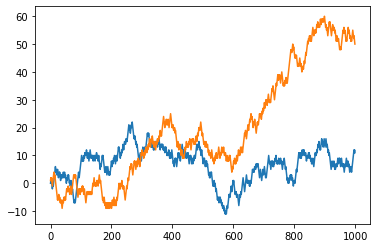

In [37]:
import random
import matplotlib.pyplot as plt

# Approach 1: simulating in a "pure" Python approach
position = 0
walk = [position]  
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:1000])   # represented by blue line


# Approach 2: achieving the same with NumPy arrays
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)  # generate 1000x1 array with values of either 0 or 1
steps = np.where(draws > 0, 1, -1)  # compute on "draws" array: translate 1->1 and 0->-1
walk=steps.cumsum()   # compute on "steps" array: obtain cumulative sum

plt.plot(walk[:1000])   # represented by orange line


# getting maximum and minimum of random walk values
walk.min()   
walk.max()

Simulating multiple random walks at once with NumPy with ease:

In [38]:
nwalks = 1000
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps))  # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [ -1,  -2,  -1, ...,  26,  25,  26],
       [ -1,   0,   1, ...,  -4,  -5,  -4],
       [ -1,  -2,  -3, ...,  -6,  -5,  -4]])

In [39]:
# compute maximum and minimum values of all 1000 walks
walks.max()
walks.min()

hits30 = (np.abs(walks) >= 30).any(1)  # evaluate whether each walk has hit value of 30 or greater

hits30.sum()  # compute number of walks that hit 30

# compute number of walks to achieve 30 for those that do hit
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times

array([133, 395, 343, 301, 205, 407, 303, 631, 239, 735, 963,  95, 121,
       191, 553, 639, 951, 403, 607, 735, 371, 233, 953, 447, 909, 289,
       639, 749, 303, 163, 835, 131, 351, 723,  75, 557, 357, 661, 751,
       273, 457, 507, 647, 485, 933, 163, 337, 461, 777, 293, 367, 239,
       953, 889, 619, 429, 181, 779, 947, 109, 385, 375, 123, 937, 537,
       245, 771, 279, 733, 999, 863, 317, 577, 445, 145, 175, 673, 943,
       533, 605, 971, 807, 921, 609, 341, 635, 727, 393, 497, 437, 217,
       465, 905, 519, 935, 759, 781, 841, 259, 441,  75, 871, 573, 209,
       639, 705, 267, 753, 237, 211, 631, 375, 451, 239, 897, 267, 253,
       463, 609, 615, 215, 883, 253, 749, 561, 397, 431, 707, 477, 775,
       355, 665, 577, 649, 327, 667, 135, 305, 655, 213, 223, 557,  93,
       567, 287, 755, 827, 569, 303, 245, 535, 385, 945, 731, 639, 837,
       295, 663, 531, 363, 647, 825, 147, 481, 479, 701, 251, 613, 493,
       841, 487, 269, 917, 509, 859, 323, 325, 919, 591, 831, 76